<a href="https://colab.research.google.com/github/leenago/Self_studying/blob/master/Matplotlib/Matplotlib_document_Usage_Guide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# (드디어 해보는) Matplotlib document 따라하기
 - 정말 간단한 시각화조차 하기 어려웠던 날들,,
 - 공부를 제대로 하지 않았기에, 이번에 기회가 생겼을 때, document를 보며 감을 익혀본다.
  - 오전에 업무 할당량을 다 끝내버려서 할 일이 없었다 나이스(?)

#1. Introductory

## 1) Usage Guide

In [47]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd

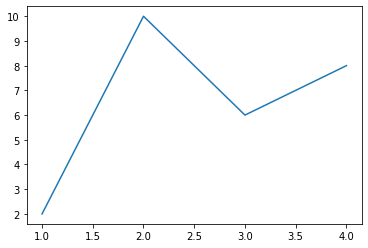

In [6]:
fig, ax = plt.subplots() #Create a figure containing a single axes
ax.plot([1,2,3,4], [2,10,6,8]) #Plot some data on the axes
# ax.plot([x값], [y값])

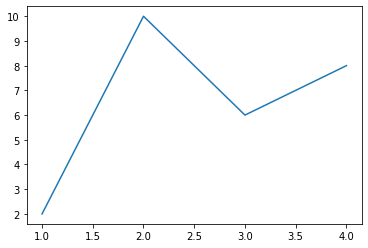

In [7]:
#there is a corresponding function in the plt module that performs that plot on the 'current' axes, creating that axes (and its parent figure)
#if they don't exist yet
plt.plot([1,2,3,4], [2,10,6,8])

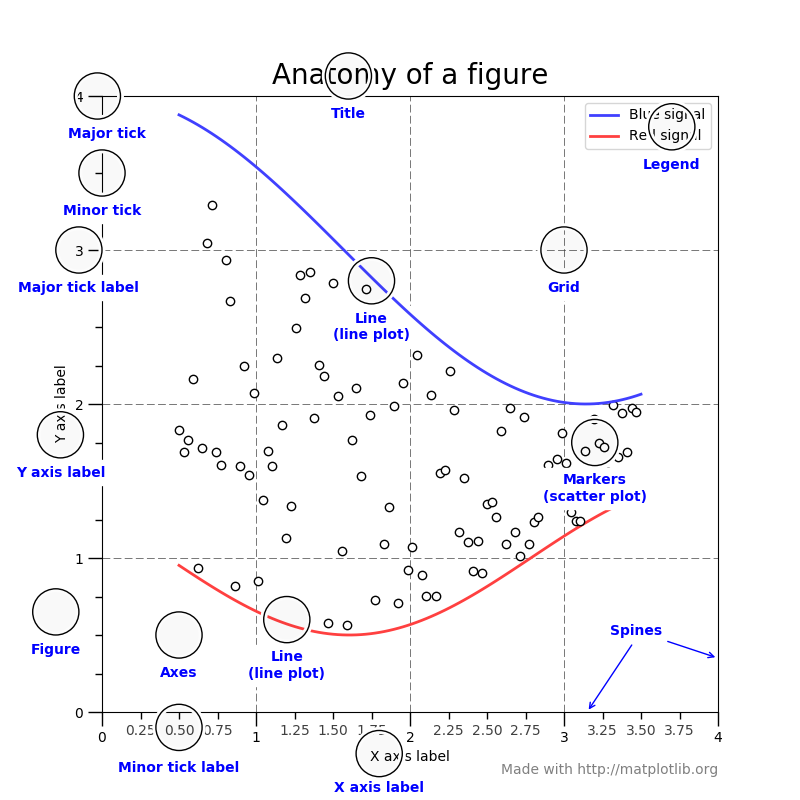

#### - figure

<Figure size 432x288 with 0 Axes>

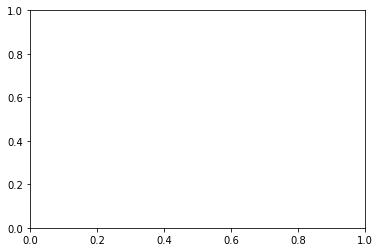

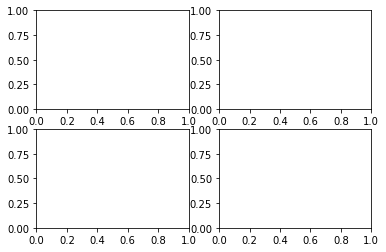

In [13]:
fig = plt.figure()
fig, ax = plt.subplots()
print('\n')

fig, axs = plt.subplots(2,2)

#### - Axes
 - The Axes contains two (or three in the case of 3D) Axis objects which take care of the data limits
 - Axes:
 - Axis: 축

#### - Types of inputs to plotting functions

In [18]:
#converting pandas
a = pd.DataFrame(np.random.rand(4,5), columns = list('abcde'))
a_asarray = a.values ; a_asarray

array([[0.92438269, 0.6010242 , 0.14574405, 0.70224595, 0.86915704],
       [0.29361454, 0.28620353, 0.95425479, 0.86602587, 0.87850585],
       [0.57676219, 0.16814076, 0.24885526, 0.94272439, 0.37043085],
       [0.44305132, 0.43270346, 0.18135113, 0.45758868, 0.247908  ]])

In [21]:
#converting numpy.matrix
b = np.matrix([[1,2], [3,4]])
b_asarray = np.asarray(b) ; b_asarray

array([[1, 2],
       [3, 4]])

#### - The object-oriented interface and the pyplot interface
  - Two ways to use Matplotlib
    - Explicitly create figures and axes, and call methods on them (the 'object-oriented OO style')
    - Rely on pyplot to automatically create and manage the figures and axes, and use pyplot functions for plotting

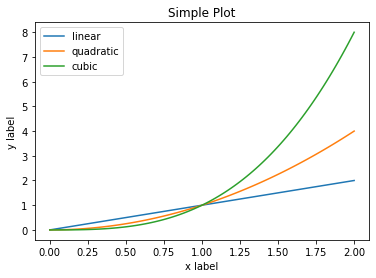

In [22]:
# ① 'object-oriented OO style'

x = np.linspace(0, 2, 100) #0부터 2까지 100개로 쪼개기

fig, ax = plt.subplots() #Create a figure and an axes

ax.plot(x,x, label = 'linear') #Plot some data on the axes
ax.plot(x, x**2, label = 'quadratic')
ax.plot(x, x**3, label = 'cubic') 

ax.set_xlabel('x label')
ax.set_ylabel('y label')
ax.set_title('Simple Plot')
ax.legend()

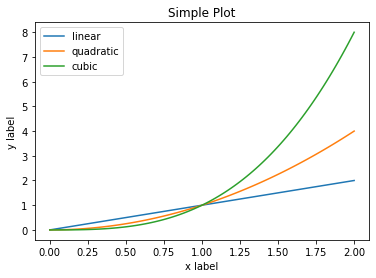

In [24]:
# ② pyplot-style

x = np.linspace(0, 2, 100)

plt.plot(x, x, label = 'linear') #plot some data on the implicit axes
plt.plot(x, x**2, label = 'quadratic')
plt.plot(x, x**3, label = 'cubic')

plt.xlabel('x label')
plt.ylabel('y label')
plt.title('Simple Plot')
plt.legend()

In [45]:
#making functions to do the plotting

def my_plotter(ax, data1, data2, param_dict):
  out = ax.plot(data1, data2, **param_dict) #This star-import imports everyting both from pyplot and from numpy
  return out

#### cf) np.random.randit vs rand vs randn
① np.random.randit: 균일 분포(모든 확률변수에 대한 균일한 확률을 보이는 분포)의 정수 난수 1개 생성
② np.random.rand: 0부터 1 사이의 균일 분포에서 난수 matrix array 생성
③ np.random.randn: 가우시안 표준 정규 분포 (Bell curve)에서 난수 matrix array 생성

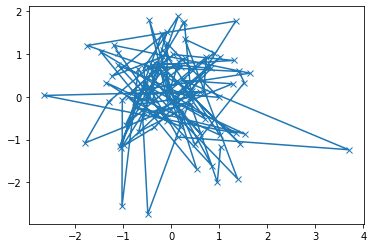

In [44]:
data1, data2, data3, data4 = np.random.randn(4, 100)
fig, ax = plt.subplots(1, 1)
my_plotter (ax, data1, data2, {'marker' :'x'})

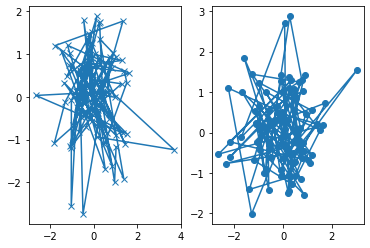

In [46]:
fig, (ax1, ax2) = plt.subplots(1,2)

my_plotter(ax1, data1, data2, {'marker':'x'})
my_plotter(ax2, data3, data4, {'marker':'o'})

## 2) Customizing Matplotlib with style sheets and rcParams

In [54]:
#Using style sheets
from cycler import cycler
plt.style.use('ggplot')
data = np.random.randn(50)

In [56]:
#Listing all available styles
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


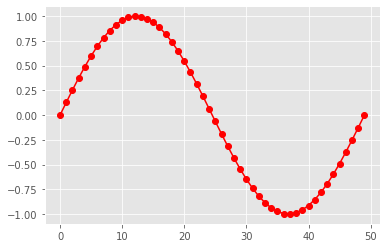

In [60]:
#Temporary styling
with plt.style.context('fast'):
  plt.plot(np.sin(np.linspace(0, 2*np.pi)), 'r-o')
plt.show()

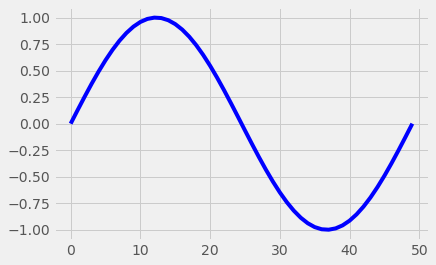

In [62]:
with plt.style.context('fivethirtyeight'):
  plt.plot(np.sin(np.linspace(0,2*np.pi)), 'b')
plt.show()

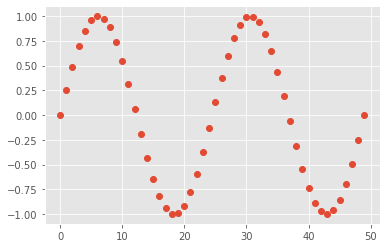

In [63]:
with plt.style.context('ggplot'):
  plt.plot(np.sin(np.linspace(0,4*np.pi)), 'o')
plt.show()

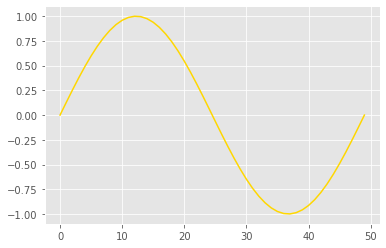

In [67]:
with plt.style.context('seaborn-muted'):
  plt.plot(np.sin(np.linspace(0,2*np.pi)), 'gold')
plt.show()

##### - matplotlib rcParams

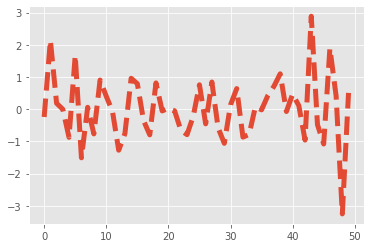

In [69]:
mpl.rcParams['lines.linewidth'] = 5
mpl.rcParams['lines.linestyle'] = '--'
plt.plot(data)

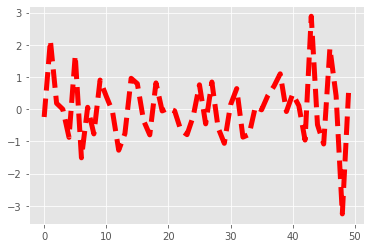

In [74]:
#In order to change the usual plot color, you have to change the 'prop_cycle' property of axes
mpl.rcParams['axes.prop_cycle'] = cycler(color = ['r','g','b','y'])
plt.plot(data)

##### - Styling with cycler

In [117]:
x = np.linspace(0, 2*np.pi, 50)


offsets = np.linspace(0, 2*np.pi, 4, endpoint = False)
test = np.linspace(0, 2*np.pi, 4, endpoint = True)
#endpoint : 0부터 2*np.pi까지, 4개의 요소로 만들면서 stop 값인 4를 포함시키라는 뜻 / False로 설정하면 해당 Stop 값은 제외됨 (default: True)

yy = np.transpose([np.sin(x + phi) for phi in offsets])
xx = np.transpose([np.sin(x + phi) for phi in test])

In [118]:
print(offsets)
print(test)

[0.         1.57079633 3.14159265 4.71238898]
[0.         2.0943951  4.1887902  6.28318531]


In [86]:
print(yy.shape)

(50, 4)


In [102]:
default_cycler = (cycler(color = ['mistyrose','salmon', 'lightcoral','indianred']) + cycler(linestyle = ['-','dotted',':','solid']))

plt.rc('lines',linewidth = 4)
plt.rc('axes', prop_cycle = default_cycler)

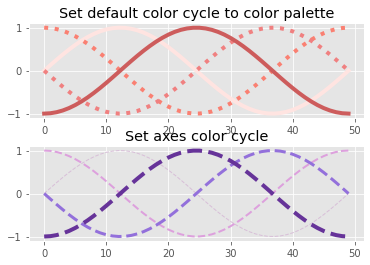

In [111]:
custom_cycler = (cycler(color = ['thistle','plum','mediumpurple','rebeccapurple']) + cycler(lw = [1,2, 3, 4])) #lw: linewidth

fig, (ax0, ax1) = plt.subplots(nrows = 2)
ax0.plot(yy)
ax0.set_title('Set default color cycle to color palette')
ax1.set_prop_cycle(custom_cycler)
ax1.plot(yy)
ax1.set_title('Set axes color cycle')

#Add a bit more space between the two plots.
fig.subplots_adjust(hspace = 0.3)
plt.show()

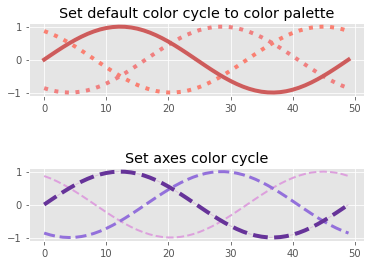

In [110]:
fig, (ax0, ax1) = plt.subplots(nrows = 2) #nrows가 2로 되어있어서, 위아래로 1개씩 / plt.subplots(1,2)였다면 한 row에 2개
ax0.plot(xx)
ax0.set_title('Set default color cycle to color palette')
ax1.set_prop_cycle(custom_cycler)
ax1.plot(xx)
ax1.set_title('Set axes color cycle')

#Add a bit more space btw the two plots.
fig.subplots_adjust(hspace = 1) #너무 간격을 많이 주게 되면, 폭이 줄어들어 그래프가 찌그러짐!
plt.show()

##### - Cycling through multiple properties

In [121]:
#① adding
cc = (cycler(color = list('rgb')) + cycler(linestyle=['-','--','-.']))

for d in cc:
  print(d)

{'color': 'r', 'linestyle': '-'}
{'color': 'g', 'linestyle': '--'}
{'color': 'b', 'linestyle': '-.'}


In [123]:
#② multiplying 
ccc = (cycler(color = list('rgb')) * cycler(linestyle = ['-','--','-.']))

for d in ccc:
  print(d)

{'color': 'r', 'linestyle': '-'}
{'color': 'r', 'linestyle': '--'}
{'color': 'r', 'linestyle': '-.'}
{'color': 'g', 'linestyle': '-'}
{'color': 'g', 'linestyle': '--'}
{'color': 'g', 'linestyle': '-.'}
{'color': 'b', 'linestyle': '-'}
{'color': 'b', 'linestyle': '--'}
{'color': 'b', 'linestyle': '-.'}
